In [29]:
import pandas as pd

from datetime import datetime 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pylab as plt1

from IPython.display import HTML

In [30]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [31]:
visitors = pd.read_csv("./visitors.csv")
quotes = pd.read_csv("./quotes.csv")
#visitors.shape, quotes.shape
#((59996, 8), (64330, 5))

<h1><center>Report - Analytics Challenge</center></h1>

# 1. Visitors and Conversion Rate

## (1) How does the number of visitors change over time?

In [32]:
visitors['session_date'] = pd.to_datetime(visitors["session_date"])
time_visitors = visitors['session_date'].value_counts().sort_index()
time_visitors_request = visitors.loc[visitors["sent_request"]==1,:]
time_visitors_request = time_visitors_request['session_date'].value_counts().sort_index()
data = [go.Scatter(x=time_visitors.index, y=time_visitors.values, name='visitors'),\
       go.Scatter(x=time_visitors_request.index, y=time_visitors_request.values, name='visitors_sent_Request')]
layout = go.Layout(dict(title = "Counts of visitors",
                  xaxis = dict(title = 'Date'),yaxis = dict(title = 'Count'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

#### Explanation: 

   The number of visitors displays a clear cyclical fluctuation in August 2016. As shown on the plot, the fluctuations take around 7 days as a circulation. Specifically, at the beginning of the month, the number of visitors reaches a peak, and then it drops gradually to the low point in 5-6 days. After touching the bottom, it suddenly increases to another peak again. The maximal number of visitors is at the third peak, that is, around 22th of the month(2825 visitors); and the minimal number of visitors is at the first low point, that is, around 7th of the month(1503 visitors). 
    
   Furthermore, if we plot the number of visitors who have sent the request to the company, we can see that the trend is almost the same as the total visitors. 

## (2) What percent of visitors submit a project request?

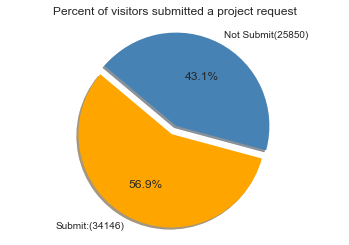

In [33]:
num_visitors = visitors.shape[0]
num_visitors_request = sum(visitors['sent_request'])
percent_request = num_visitors_request / num_visitors 

labels = 'Submit:(%d)'%num_visitors_request, 'Not Submit(%d)'%(num_visitors-num_visitors_request)
sizes = [num_visitors_request, num_visitors-num_visitors_request]
colors = ['orange', 'steelblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percent of visitors submitted a project request')
plt.show()


#### Explanation: 

The total number of visitors is 599961 and the number of visitors submitted a request is 34146, which is 56.9% of the total visitors. 

## (3) How do category and device influence these metrics?

### Hypothesis 1: The demand for different categories of projects may vary among Thumbtack customers. (Different categories of service that Thumbtack customers look for may influence their visits to the company and their request.)

#### Result:  

1. According to the graph shown as below, the demand for different categories of projects varies among Thumbtack customers. Compared to House cleaning, local moving(under 50 miles) is more popular among customers, which brings more visitors to the company and more visitors sent a request.  

2. As for the fluctuation of each category, local moving has the similar trend of fluctuation as the total number of visitors and the total number of visitors who submit a request. The highest point and the lowest point are consistent, too. However, house cleaning has less fluctuation. The gap of the maximum and minimum number of visitors looking for house cleaning is just around 240.

Hence, Local moving contributes a lot to the visitor volume and the request volume.

In [34]:
# how does category influence the changement of the visitors
time_category = visitors.groupby(by = ["session_date","category_name"])["request_id"].count()
time_category=time_category.transpose()
df_category = time_category.to_frame().unstack()
df_category.reset_index()
df_category.columns = ["House Cleaning (One Time)","Local Moving (under 50 miles)"]
df_category

time_visitors = visitors['session_date'].value_counts().sort_index()
time_visitors_request = visitors.loc[visitors["sent_request"]==1,:]
time_visitors_request = time_visitors_request['session_date'].value_counts().sort_index()
data = [go.Scatter(x=time_visitors.index, y=time_visitors.values, name='visitors'), \
        go.Scatter(x=time_visitors_request.index, y=time_visitors_request.values, name='visitors_sent_Request'),\
        go.Scatter(x=df_category.index, y=df_category["House Cleaning (One Time)"], name='House Cleaning (One Time)'),\
        go.Scatter(x=df_category.index, y=df_category["Local Moving (under 50 miles)"], name="Local Moving (under 50 miles)")]
layout = go.Layout(dict(title = "How does category influence the changement of the visitors",
                  xaxis = dict(title = 'Date'),yaxis = dict(title = 'Count'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Hypothesis 2: Customers have preference on using devices. Different kinds of device that customers use may influence their visit to the company and their willing to request.

#### Result: 

1. Customers do have different preferences on using desktop or mobile devices. Generally, more Thumbtack customers prefer using desktop to look for local services.

2. The fluctuation of using desktop devices is similar to the fluctuation of the number of visitors and the number of visitors who submitted a request, which means that website contributes a lot to the visitor volume and the request volume. However, the fluctuation of using mobile devices is small, but smooth. Interestingly, when the number of visitors using desktop is at the low points, since the number of visitors using mobile devices is stable, the company has more visitors using mobile devices than using desktop,  and therefore mobile contributes more to the visitor volume and the request volume. Hence, the effect of the mobile can not be ignored.

Hence, generally speaking, the use of desktop may have more influence on the visitor volume and the request volume. However, the use of mobile also plays an important role in the visitor volume and the request volume when the use of desktop has bad performance. 

In [35]:
# how does device influence the changement of the visitors
time_device = visitors.groupby(by = ["session_date","device"])["request_id"].count()
time_device=time_device.transpose()
df_device = time_device.to_frame().unstack()
df_device.reset_index()
df_device.columns = ["desktop","mobile"]
df_device

visitors['session_date'] = pd.to_datetime(visitors["session_date"])
time_visitors = visitors['session_date'].value_counts().sort_index()
data = [go.Scatter(x=time_visitors.index, y=time_visitors.values, name='visitors'), \
        go.Scatter(x=time_visitors_request.index, y=time_visitors_request.values, name='visitors_sent_Request'),\
        go.Scatter(x=df_device.index, y=df_device.desktop, name='desktop'), \
        go.Scatter(x=df_device.index, y=df_device.mobile, name='mobile')]
layout = go.Layout(dict(title = "How does device influence the changement of the visitors",
                  xaxis = dict(title = 'Date'),yaxis = dict(title = 'Count'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Hypothesis 3: The devices visitors use and the service visitors look for may influence their willing to submit a request. 

#### Result:

1. When we go into the visitors who submitted a request, we find that when visitors are using desktop device, they are more likely to submit a request (54.8%); when visitors are looking for local moving service, they are more likely to submit a request(67.9%). This is consistent with hypothesis 1 and hypothesis 2. 

2. The gap between visitors using different devices is not large, which help us confirm that the effect of mobile cannot be ignored. This is because the fluctuation of these two devices are different. The fluctuation of desktop is strong, while the fluctuation of mobile is smooth, which makes up the request volume.

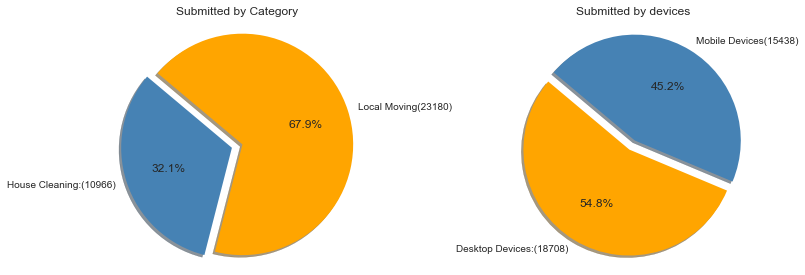

In [36]:
## calculate the number of total visitors who submit the request by category
visitors_submit = visitors.loc[visitors["sent_request"]==1,:]
submit_category = visitors_submit.groupby(by = ["category_name"])["request_id"].count()
## calculate the house cleaning and the local moving number 
num_visitors_request = sum(visitors['sent_request'])
house = 10966
local_moving = 23180

fig = plt.figure(figsize=(13, 10))
plt.subplot(221)
labels = 'House Cleaning:(%d)'%house, 'Local Moving(%d)'%(local_moving)
sizes = [house, local_moving]
colors = ['steelblue', 'orange']
explode = (0.1, 0)  # explode 1st slice
## Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Submitted by Category')

## calculate the number of total visitors who submit the request by device
submit_category = visitors_submit.groupby(by = ["device"])["request_id"].count()
## calculate the house cleaning and the local moving number 
num_visitors_request = sum(visitors['sent_request'])
desktop = 18708
mobile = 15438

plt.subplot(222)
labels = 'Desktop Devices:(%d)'%desktop, 'Mobile Devices(%d)'%(mobile)
sizes = [desktop, mobile]
colors = ['orange', 'steelblue']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Submitted by devices')
plt.show()

In [37]:
d = visitors.loc[visitors["device"]=="mobile",:]
d.shape

(27701, 8)

# 2. Quotes Per Request

## (1) What is the distribution of the number of quotes per request?

In [38]:
visitors_submit = visitors.loc[visitors["sent_request"]==1,:]
#visitors_submit.shape 
# (34146, 8)
# request id that has quotes
# (26859)
#find the request that submitted but no quotes
quotes["quote0"]=1
vq = visitors_submit.merge(quotes,how="left", left_on = "request_id",right_on = "request_id")
vq1 = vq.loc[vq["quote0"]!=1,:]
#vq1["request_id"].nunique() 
# 7287

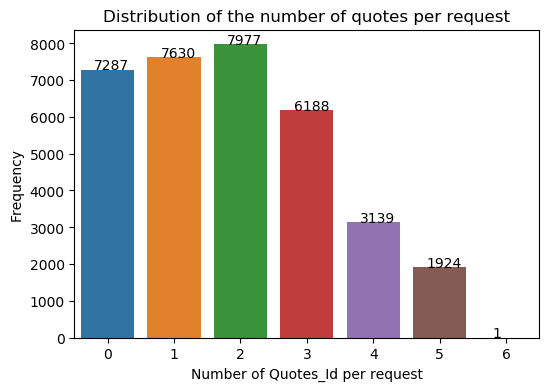

In [39]:
per_request = quotes.groupby(by = ["request_id"])["quote_id"].count()
df = per_request.to_frame().reset_index()

df_quote = df["quote_id"].value_counts().sort_index().to_frame().reset_index()
line = pd.DataFrame({'index': 0, 'quote_id': 7287}, index=[0])
df_quote = pd.concat([line,df_quote]).reset_index(drop=True)
df_quote["index"] = df_quote["index"].astype("category")

#plot 
sns.reset_orig()
plt.figure(figsize = (6,4))
sns.barplot(x = df_quote["index"], y = df_quote["quote_id"], data=df_quote)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(df_quote["quote_id"]):
    plt.text(xlocs[i]-0.2, v + 0.3, str(v))
plt.xlabel('Number of Quotes_Id per request')
plt.ylabel('Frequency')
plt.title('Distribution of the number of quotes per request')
plt.show()

#### Explanation: 

The distribution is shown as above. It is similar to a right skewed distribution, which means most requests have no more than 3 quotes. The most common situation is that for each request, it has 2 quotes. And the maximum number of quotes for a request is 6, which only has one case. Since the maximum number of quotes per request is 5, we may consider that request as an outlier.

Besides, we can see that there are 7287 requests that don't have any quotes. We need to pay attention to those requests and try to find out the reason why those requests don't have any quotes. 

## (2) What factors contribute to some requests getting more quotes than others?

The possible factors are distance of local moving, the number of bedrooms that need cleaning and the number of bathrooms that need cleaning. 

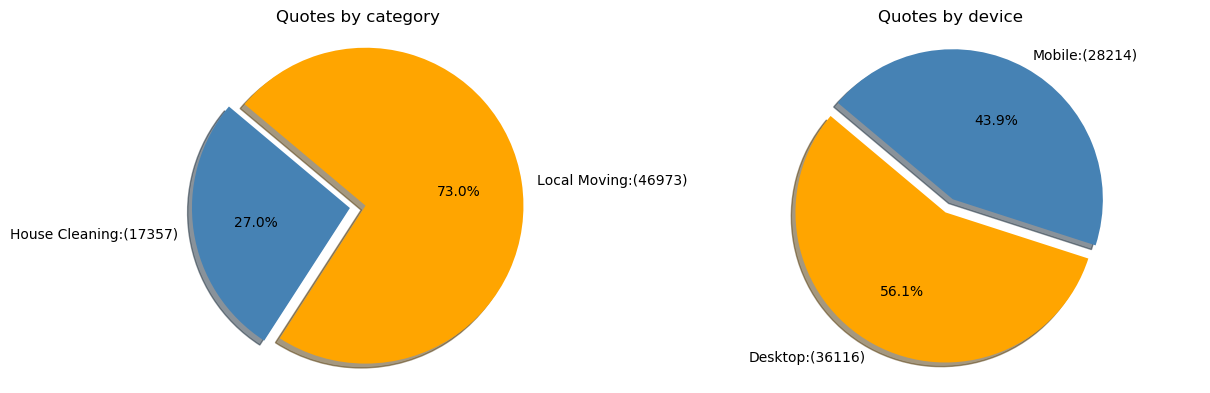

In [51]:
# request with quotes
quote_more_request = quotes.merge(visitors,how = "inner", left_on = "request_id",right_on = "request_id")

fig = plt.figure(figsize=(14, 10))
# quotes by category
quote_cat = quote_more_request.groupby(by = ["category_name"])["quote_id"].count()
num_house = 17357
num_move = 46973
 ## Plot
plt.subplot(221)
labels = 'House Cleaning:(%d)'%num_house, 'Local Moving:(%d)'%num_move
sizes = [num_house, num_move]
colors = ['steelblue', 'orange']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quotes by category')

# quotes by devices
quote_device = quote_more_request.groupby(by = ["device"])["quote_id"].count()
num_desktop = 36116
num_mobile = 28214

 ## Plot
plt.subplot(222)
labels = 'Desktop:(%d)'%num_desktop, 'Mobile:(%d)'%num_mobile
sizes = [num_desktop, num_mobile]
colors = ['orange', 'steelblue']
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Quotes by device')
plt.show()

### Hypothesis 1: For local moving(under 50 miles) service, the distance may influence the number of quotes for each request.

#### Result:

The distance of local moving will influence the number of quotes for each request. Generally speaking, when the distance becomes far(31-50 miles) or when the local moving is within the same building, the number of quotes per request is less. Usually, 0-20 miles distance will have more quotes for requests than others, especially when distance is between 11-20 miles, the number of quotes per request will be more than others.

In [52]:
# see more detail in category
# local moving
quote_moving_full = quote_more_request.loc[quote_more_request["category_name"]=="Local Moving (under 50 miles)",:]
quote_moving = quote_moving_full.groupby(by = ["request_id"])["quote_id"].count()
quote_moving = quote_moving.to_frame().reset_index()
quote_moving = quote_moving.merge(visitors_submit,how="inner",left_on = "request_id", right_on = "request_id")
quote_moving["quote_id"] = quote_moving["quote_id"].astype("category")

# how_far
quote_far = quote_moving.groupby(by=["how_far","quote_id"])["request_id"].count()
quote_far = quote_far.to_frame().reset_index()
far1 = quote_far.loc[quote_far["how_far"]=="Within the same building",:]
far2 = quote_far.loc[quote_far["how_far"]=="Less than 5 miles",:]
far3 = quote_far.loc[quote_far["how_far"]=="5 - 10 miles",:]
far4 = quote_far.loc[quote_far["how_far"]=="11 - 20 miles",:]
far5 = quote_far.loc[quote_far["how_far"]=="21 - 30 miles",:]
far6 = quote_far.loc[quote_far["how_far"]=="31 - 50 miles",:]

data = [go.Scatter(x=far1.quote_id, y=far1.request_id, name='Within the same building'),\
       go.Scatter(x=far2.quote_id, y=far2.request_id, name='Less than 5 miles'),\
       go.Scatter(x=far3.quote_id, y=far3.request_id, name='5 - 10 miles'),\
       go.Scatter(x=far4.quote_id, y=far4.request_id, name='11 - 20 miles'),\
       go.Scatter(x=far5.quote_id, y=far5.request_id, name='21 - 30 miles'),\
       go.Scatter(x=far6.quote_id, y=far6.request_id, name='31 - 50 miles')]
layout = go.Layout(dict(title = "The influence of distance",
                  xaxis = dict(title = 'number of quotes per request'),yaxis = dict(title = 'frequency'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Hypothesis 2: For house cleaning (one time) service, different type of bedrooms may influence the number of quotes per request.

#### Result:

Different number of rooms will influence the number of quotes per request. Generally speaking, the request for cleaning 3 bedrooms may get the most number of quotes than other requests.(The green line) the request for cleaning studio may get the least number of quotes, which mostly around 1-3 quotes. Seldom of studio cleaning requests have 4+ quotes. The number of quotes for 2-bedroom request and 4-bedroom request are almost the same. The number of 1-bedroom request and 5-bedroom request are almost the same, which is less than 2-bedroom request and 4-bedroom request.

Hence, the distribution of the number of quotes per request follows the normal distribution. 3 bedrooms are the peak point. When the number of bedrooms increase, the number of quotes per request may increase, and after getting the number of 3, the number of quotes per request may decrease. 

This makes sense in real life. When the number of rooms are small, increasing the number of rooms may get more money for pros. However, when it reaches a point, the marginal benefit will decrease, which makes the quotes per request less.

In [42]:
# house cleaning
quote_house_full = quote_more_request.loc[quote_more_request["category_name"]=="House Cleaning (One Time)",:]
quote_house = quote_house_full.groupby(by = ["request_id"])["quote_id"].count()
quote_house = quote_house.to_frame().reset_index()
quote_house = quote_house.merge(visitors_submit,how="inner",left_on = "request_id", right_on = "request_id")
quote_house["quote_id"] = quote_house["quote_id"].astype("category")

# house cleaning - bedroom
quote_bedroom = quote_house.groupby(by=["num_bedrooms","quote_id"])["request_id"].count()
quote_bedroom = quote_bedroom.to_frame().reset_index()
quote_bedroom["quote_id"] = quote_bedroom["quote_id"].astype("category")

bed1 = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="1 bedroom",:]
bed2 = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="2 bedrooms",:]
bed3 = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="3 bedrooms",:]
bed4 = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="4 bedrooms",:]
bed5 = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="5+ bedrooms",:]
beds = quote_bedroom.loc[quote_bedroom["num_bedrooms"]=="Studio",:]

data = [go.Scatter(x=bed1.quote_id, y=bed1.request_id, name='1 bedroom'),\
       go.Scatter(x=bed2.quote_id, y=bed2.request_id, name='2 bedrooms'),\
       go.Scatter(x=bed3.quote_id, y=bed3.request_id, name='3 bedrooms'),\
       go.Scatter(x=bed4.quote_id, y=bed4.request_id, name='4 bedrooms'),\
       go.Scatter(x=bed5.quote_id, y=bed5.request_id, name='5+ bedrooms'),\
       go.Scatter(x=beds.quote_id, y=beds.request_id, name='Studio')]
layout = go.Layout(dict(title = "The influence of bedroom",
                  xaxis = dict(title = 'number of quotes per request'),yaxis = dict(title = 'frequency'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Hypothesis 3: For house cleaning (one time) service, different number of bathrooms may influence the number of quotes per request.

#### Result: 

The distribution of each number of bathrooms are almost similar to the bedroom. In most cases, 2-bathroom cleaning request gets the most number of quotes per request. The 3-bathroom request and 1-bathroom request follow 2-bathroom request. And the 4+bathroom request and 1.5-bathroom request has the least number of quotes per request. 

Even though the difference is small when it comes to the 3+ quotes, 2-bathroom cleaning request has the best performance. The reason is the same as bedrooms. When the room number is small, getting one more room may increase the benefit for professionals; however, when it reaches one point, the marginal benefit start to decrease, which makes the number of quotes less.

In [43]:
# house cleaning - bathroom
quote_bathroom = quote_house.groupby(by=["num_bathrooms","quote_id"])["request_id"].count()
quote_bathroom = quote_bathroom.to_frame().reset_index()
quote_bathroom["quote_id"] = quote_bathroom["quote_id"].astype("category")
quote_bathroom

bath1 = quote_bathroom.loc[quote_bathroom["num_bathrooms"]=="1 bathroom",:]
bath1_5 = quote_bathroom.loc[quote_bathroom["num_bathrooms"]=="1.5 bathrooms",:]
bath2 = quote_bathroom.loc[quote_bathroom["num_bathrooms"]=="2 bathrooms",:]
bath3 = quote_bathroom.loc[quote_bathroom["num_bathrooms"]=="3 bathrooms",:]
bath4_ = quote_bathroom.loc[quote_bathroom["num_bathrooms"]=="4+ bathrooms",:]


data = [go.Scatter(x=bath1.quote_id, y=bath1.request_id, name='1 bathroom'),\
       go.Scatter(x=bath1_5.quote_id, y=bath1_5.request_id, name='1.5 bathrooms'),\
       go.Scatter(x=bath2.quote_id, y=bath2.request_id, name='2 bathrooms'),\
       go.Scatter(x=bath3.quote_id, y=bath3.request_id, name='3 bathrooms'),\
       go.Scatter(x=bath4_.quote_id, y=bath4_.request_id, name='4+ bathrooms')]
layout = go.Layout(dict(title = "The influence of bathroom",
                  xaxis = dict(title = 'number of quotes per request'),yaxis = dict(title = 'frequency'),
                ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

### Hypothesis 4: There are some other reasons that cause some requests that have no quotes from pros.

#### Result: 

From question(1) we find that some requests have no quotes from pros. Hence, we plot different types of house cleaning types and local moving types. Interestingly, most requests are those we find that should be have more quotes in hypothesis we discuss before. However, they have no quotes from pros. 

For example, if we see the local moving request, we find that most customers request 5-10 miles moving and less than 5 miles driving. However, in hypothesis 1, we find that these distances have more numbers of quotes. Same as bedrooms and bathrooms, 3-bedroom request and 2-bathroom request should be popular; however they have most number of requests that have no quotes. Therefore, we need more data and information to explain this phenomenon.

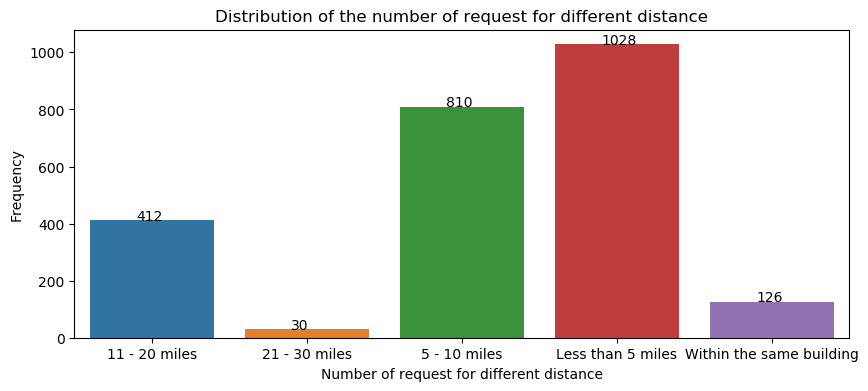

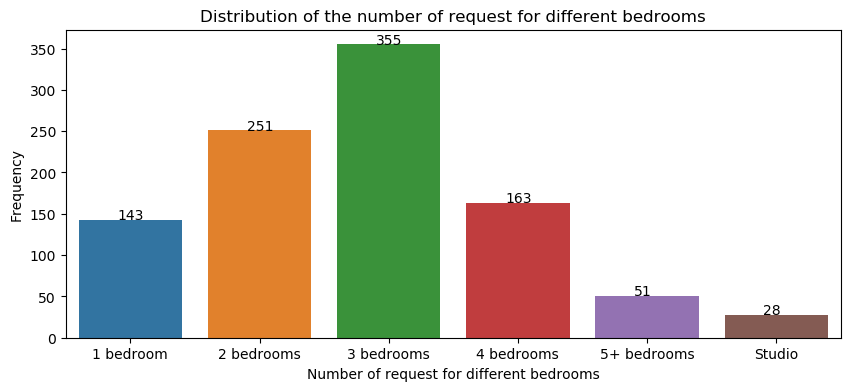

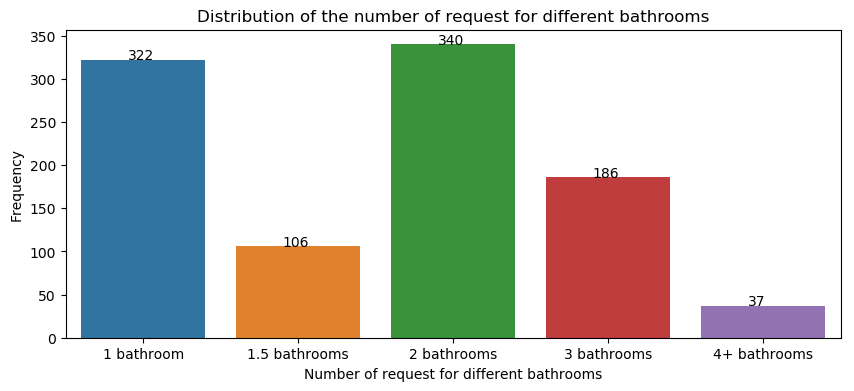

In [44]:
# request that has no quotes
# local moving 
vq1_moving_full = vq1.loc[vq1["category_name"]=="Local Moving (under 50 miles)",:]
vq1_moving = vq1_moving_full.groupby(by = ["how_far"])["request_id"].count()
vq1_moving = vq1_moving.to_frame().reset_index()
#plot 
plt.figure(figsize = (10,4))
sns.barplot(x = vq1_moving["how_far"], y = vq1_moving["request_id"], data=vq1_moving)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(vq1_moving["request_id"]):
    plt.text(xlocs[i]-0.1, v + 0.3, str(v))
plt.xlabel('Number of request for different distance')
plt.ylabel('Frequency')
plt.title('Distribution of the number of request for different distance')
plt.show()

# house cleaning - bedroom
vq1_house_full = vq1.loc[vq1["category_name"]=="House Cleaning (One Time)",:]
vq1_bed = vq1_house_full.groupby(by = ["num_bedrooms"])["request_id"].count()
vq1_bed = vq1_bed.to_frame().reset_index()
#plot 
plt.figure(figsize = (10,4))
sns.barplot(x = vq1_bed["num_bedrooms"], y = vq1_bed["request_id"], data=vq1_bed)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(vq1_bed["request_id"]):
    plt.text(xlocs[i]-0.1, v + 0.3, str(v))
plt.xlabel('Number of request for different bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of the number of request for different bedrooms')
plt.show()

# house cleaning - bedroom
vq1_bath = vq1_house_full.groupby(by = ["num_bathrooms"])["request_id"].count()
vq1_bath = vq1_bath.to_frame().reset_index()
vq1_bath
#plot 
plt.figure(figsize = (10,4))
sns.barplot(x = vq1_bath["num_bathrooms"], y = vq1_bath["request_id"], data=vq1_bath)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(vq1_bath["request_id"]):
    plt.text(xlocs[i]-0.1, v + 0.3, str(v))
plt.xlabel('Number of request for different bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of the number of request for different bathrooms')
plt.show()

# 3. Job Value

## (1) For each category, what is the distribution of quote prices for a project?

In [45]:
visitors_quotes = visitors.merge(quotes,how="inner",left_on = "request_id", right_on = "request_id")
#visitors_quotes.shape
#(64330, 14)
#visitors_quotes["request_id"].nunique()
#26859

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



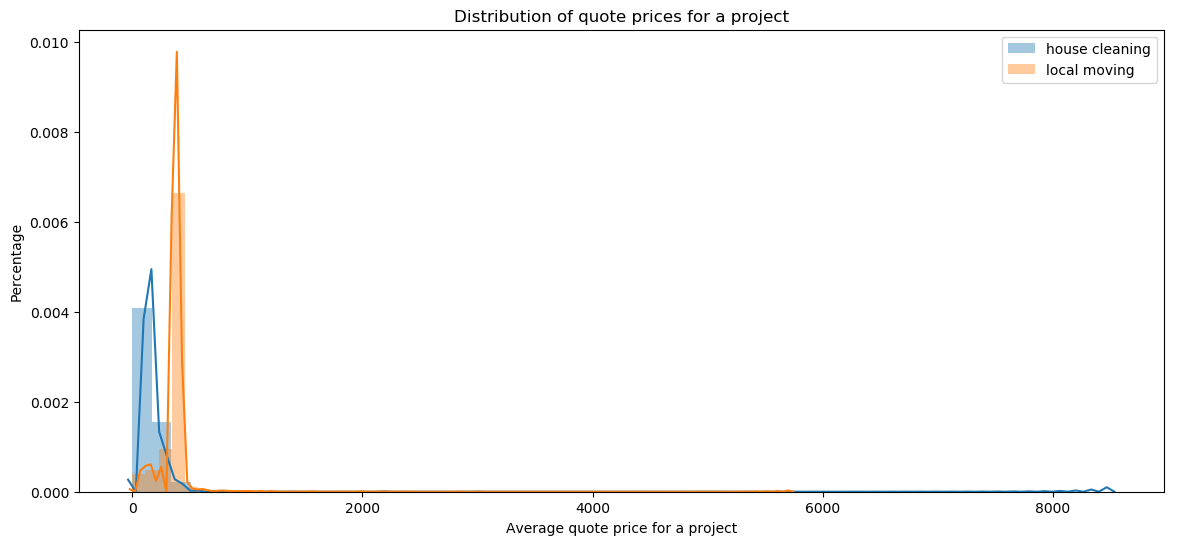

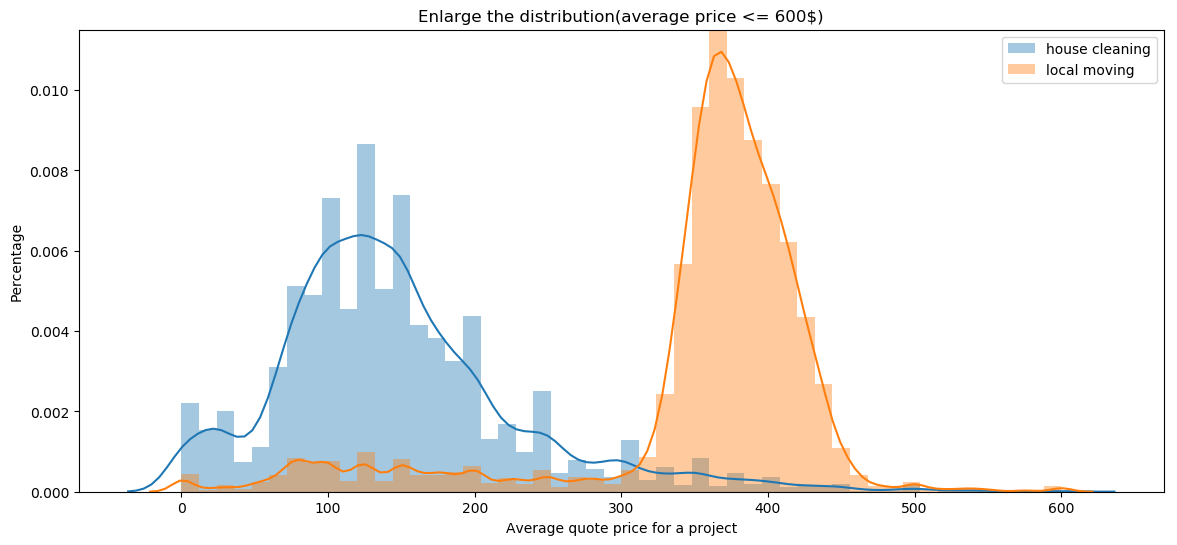

In [56]:
## For each category, find the average price for each project
visitors_quotes_cat = visitors_quotes.groupby(by = ["category_name","pro_id"])["quote_price"].mean()
visitors_quotes_cat = visitors_quotes_cat.to_frame().reset_index()
#drop NAN
visitors_quotes_cat = visitors_quotes_cat.dropna(axis = 0, inplace = False) 
#set data
visitors_quotes_house = visitors_quotes_cat.loc[visitors_quotes_cat["category_name"]=="House Cleaning (One Time)",:]
visitors_quotes_house = visitors_quotes_house.reset_index()
visitors_quotes_moving = visitors_quotes_cat.loc[visitors_quotes_cat["category_name"]=="Local Moving (under 50 miles)",:]
visitors_quotes_moving = visitors_quotes_moving.reset_index()
sns.reset_orig()
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(visitors_quotes_house["quote_price"],label = "house cleaning")
sns.distplot(visitors_quotes_moving["quote_price"],label = "local moving")
plt.xlabel('Average quote price for a project')
plt.ylabel('Percentage')
plt.title('Distribution of quote prices for a project')
plt.legend();

#set data
visitors_quotes_house = visitors_quotes_cat.loc[visitors_quotes_cat["category_name"]=="House Cleaning (One Time)",:]
visitors_quotes_house = visitors_quotes_house.loc[visitors_quotes_house["quote_price"]<=600,:]
visitors_quotes_house = visitors_quotes_house.reset_index()
visitors_quotes_moving = visitors_quotes_cat.loc[visitors_quotes_cat["category_name"]=="Local Moving (under 50 miles)",:]
visitors_quotes_moving = visitors_quotes_moving.loc[visitors_quotes_moving["quote_price"]<=600,:]
visitors_quotes_moving = visitors_quotes_moving.reset_index()
#plot
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(visitors_quotes_house["quote_price"],label = "house cleaning")
sns.distplot(visitors_quotes_moving["quote_price"],label = "local moving")
plt.xlabel('Average quote price for a project')
plt.ylabel('Percentage')
plt.title('Enlarge the distribution(average price <= 600$)')
plt.legend()

#### Explanation:

(Here, we calculate the average quote price for each request.) 

From the distribution, we can see that for local moving, the average quote price per request is around 300-500, however, for house cleaning, the average quote price per request are around 50-250$, which is less than the local moving. Hence, we get the conclusion that the price of local moving service is more expensive than that of house cleaning as a whole. 

Besides, there are some extreme price from pros which needs further exploration.

## (2) For each category, what is an appropriate price for Thumbtack to charge pros to quote?


/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



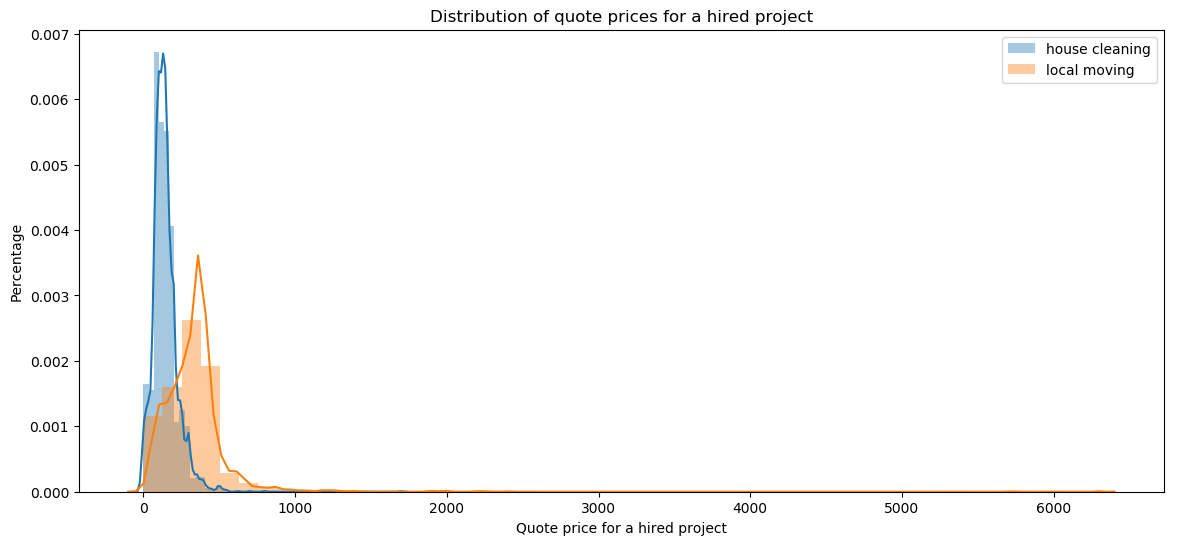

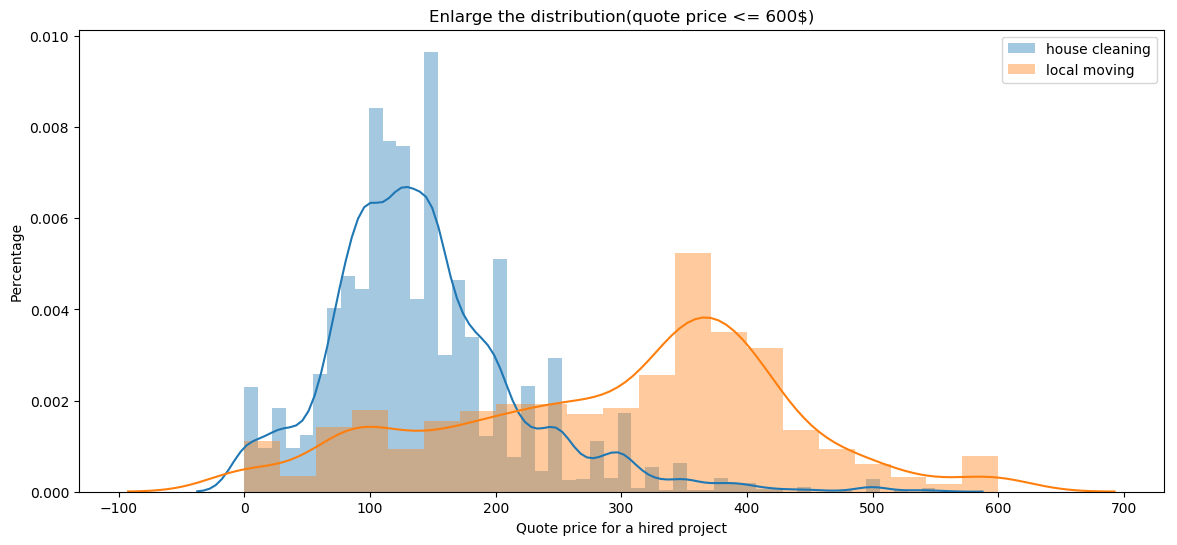

In [57]:
visitors_quotes_hired = visitors_quotes.loc[visitors_quotes["hired"]==1,:]
visitors_quotes_hired

## For each category, find the average price for each project
visitors_quotes_cat_hired = visitors_quotes_hired[["category_name","pro_id","quote_price"]]
visitors_quotes_cat_hired = visitors_quotes_cat_hired.reset_index()

#drop NAN
visitors_quotes_cat_hired = visitors_quotes_cat_hired.dropna(axis = 0, inplace = False) 
visitors_quotes_cat_hired.shape #5409

#set data
visitors_quotes_house_hired = visitors_quotes_cat_hired.loc[visitors_quotes_cat_hired["category_name"]=="House Cleaning (One Time)",:]
visitors_quotes_house_hired = visitors_quotes_house_hired.reset_index()
visitors_quotes_house_hired.shape #3214
visitors_quotes_moving_hired = visitors_quotes_cat_hired.loc[visitors_quotes_cat_hired["category_name"]=="Local Moving (under 50 miles)",:]
visitors_quotes_moving_hired = visitors_quotes_moving_hired.reset_index()
visitors_quotes_moving_hired.shape # 2195

f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(visitors_quotes_house_hired["quote_price"],label = "house cleaning")
sns.distplot(visitors_quotes_moving_hired["quote_price"],label = "local moving")
plt.xlabel('Quote price for a hired project')
plt.ylabel('Percentage')
plt.title('Distribution of quote prices for a hired project')
plt.legend();

#set data
visitors_quotes_house_hired_more = visitors_quotes_house_hired.loc[visitors_quotes_house_hired["quote_price"]<=600,:]
#visitors_quotes_house_hired_more.drop(['level_0'], axis=1)
#visitors_quotes_house_hired_more = visitors_quotes_house_hired_more.reset_index()

visitors_quotes_moving_hired_more = visitors_quotes_moving_hired.loc[visitors_quotes_moving_hired["quote_price"]<=600,:]
#visitors_quotes_moving_hired_more.drop(['level_0'], axis=1)
#visitors_quotes_moving_hired_more = visitors_quotes_moving_hired_more.reset_index()
#plot
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(visitors_quotes_house_hired_more["quote_price"],label = "house cleaning")
sns.distplot(visitors_quotes_moving_hired_more["quote_price"],label = "local moving")
plt.xlabel('Quote price for a hired project')
plt.ylabel('Percentage')
plt.title('Enlarge the distribution(quote price <= 600$)')
plt.legend()

In [63]:
# price charge for house cleaning
rank = visitors_quotes_house_hired["quote_price"]
rank = rank.to_frame()
rank = rank.sort_values(by=['quote_price'])
rank = rank.reset_index()
max_rank = 0
price = 0
for i in range(3213):
    revenue = (rank.loc[i,"quote_price"])*(3213-i)
    if max_rank < revenue:
        max_rank = revenue
        price = rank.loc[i,"quote_price"]
print("The price to charge for house cleaning is 12.0$")
print("The total revenue of that price charge is 23940$")

# price charge for house cleaning
rank1 = visitors_quotes_moving_hired["quote_price"]
rank1 = rank1.to_frame()
rank1 = rank1.sort_values(by=['quote_price'])
rank1 = rank1.reset_index()
max_rank1 = 0
price1 = 0
for i in range(2194):
    revenue = (rank1.loc[i,"quote_price"])*(2194-i)
    if max_rank1 < revenue:
        max_rank1 = revenue
        price1 = rank1.loc[i,"quote_price"]
print("The price to charge for local moving is 32.5$")
print("The total revenue of that price charge is 38935$")

The price to charge for house cleaning is 12.0$
The total revenue of that price charge is 23940$
The price to charge for local moving is 32.5$
The total revenue of that price charge is 38935$


#### Explanation: 

The question 1 shows the average price for each request. However, since Thumbtack will earn money by those quotes that are chosen by the customers in the end. Hence, we filter those requests that are finally hired by the customers and see their quote price. 

According to the graph, the distribution is kind of similar to the first question. If we take a closer look at the distribution located below 600 dollars, we find that for house cleaning, the quote price is cheaper than local moving. The quote price of house cleaning follows normal distribution, which is between 50-200 dollars and the most frequent hired quote price is around 150 dollars. On the other hand, the quote price of local moving is widely spread on the graph, which also follows the normal distribution. The most frequent hired quote price is around 350 dollars.

We then use a for loop function to see the total revenue Thumbtack may get when charging different prices. We find that for house cleaning service, when the price is 12, the largest total revenue is 23940(assuming that all pros above 120 will pay for the quote). Same as local moving service, when the price is 32.5, the largest total revenue is 38935 dollars. (assuming that all pros above 325 will pay for the quote)

Hence, we should charge the service of local moving 32.5 dollars and charge the service of house cleaning 12 dollars.

# 4. Further Exploration
## Briefly describe two other questions or analyses you would be interested in pursuing if you had more time to explore this data, or access to additional data sets.

#### Question1: Why do some requests have no quotes even though most of these requests' needs are common?

#### Explanation: 

In part2(Hypothesis 4), we find a contradictory phenomenon, that is, some requests have no quotes, even though the service they ask is common. In the dataset, we may find one reason, that is, the lack of the necessary information. Some records show "NaN" which is not a complete request. However, there are some other requests that are complete which need further explanation. Therefore, more information is needed here, such as the location for the house cleaning, the complexity of the stuff for the local moving. If we know the reason for these 0-quote request, we may better understand the preference of pros for choosing a request. 

#### Question2: How to better offer customers the ideal 3 quotes from professionals ? 

#### Explanation: 

Until now, we discussed a lot about pros and the quote price. However, since this service is customer-centric, we should focus on the customer satisfaction too. Hence, I think it is meaningful to explore more about customer's preference of choosing the final quote price. What attributes influence their final decision, such as the working experience of the pros and the reviews from past customers. Once we find the reasons, we can better push the corresponding pros to customers.

# 5. Extra Exploration

#### The attributes that influence our conclusion
(1) Data Integrity

According to the datasets we have, we only have the information of two categories and their one or two attributes. Hence, when we try to find the reason behind a phenomenon, we may focus on the data information that we have, that is the type of the bedroom, the type of the bathroom and the distance of the local moving. They are important attributes; however, if we want to learn deep about the data, we may need more information about these two categories. Hence, the integrity of the data may limit our conclusion.

(2) Multi-perspectives

Not only about the category itself, but also more information about requests should be considered together. For example, we didn't explore a lot about the device, which plays an important role in people's life. Since more and more people are using mobiles now, it is worthwhile to improve the mobile service to improve the number of request.

(3) Data purity

When we consider two datasets, we find some outliers in the data(e.g. a request with more than 5 quotes, and the below-zero quote price) If we just use these data without excluding these situations, our conclusion may be influenced a lot. 